# L12 - Decision Trees
- Instructor: Dalcimar Casanova (dalcimar@gmail.com)
- Course website: https://www.dalcimar.com/disciplinas/aprendizado-de-maquina
- Bibliography: based on lectures of Dr. Sebastian Raschka

In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()

X = iris.data[:, [2, 3]]  # we only take the first two features.
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=123, stratify=y)

In [3]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


In [4]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions


dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


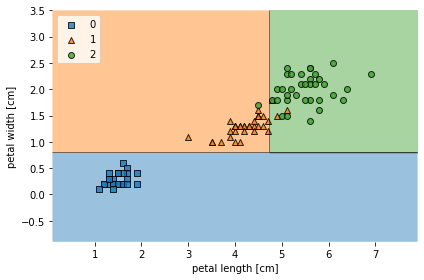

In [5]:
plot_decision_regions(X_train, y_train, dt_model)

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [6]:
y_test_pred = dt_model.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_test_pred)

0.9333333333333333

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


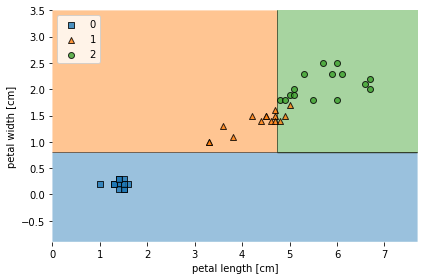

In [7]:
plot_decision_regions(X_test, y_test, dt_model)

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

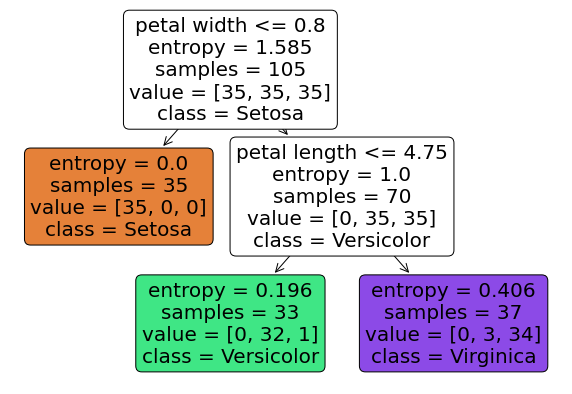

In [8]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 7))

plot_tree(dt_model, filled=True, rounded=True,
          class_names=['Setosa', 
                       'Versicolor',
                       'Virginica'],
          feature_names=['petal length', 
                         'petal width']) 

plt.show()

In [9]:
print(np.shape(X_test))
print(np.shape(y_test))

X_test1 = X_test[1,:]
y_test1 = y_test[1]

print(np.shape(X_test1))
print(np.shape(y_test1))

X_test1 = np.reshape(X_test1,(1,-1))
y_test1 = np.reshape(y_test1,(1))

print(np.shape(X_test1))
print(np.shape(y_test1))

(45, 2)
(45,)
(2,)
()
(1, 2)
(1,)


In [10]:
y_test1_pred  = dt_model.predict(X_test1)

y_test1_pred

array([2])

In [11]:
accuracy_score(y_test1, y_test1_pred)

1.0

In [12]:
X_test1

array([[6. , 1.8]])